In [1]:
from syllog_model import SyllogPyroModel

In [2]:
with open('icecream.json', 'r') as jsonfile:
    cyjson=jsonfile.read().replace('\n', '')

In [3]:
model = SyllogPyroModel.from_cyjson(cyjson)

In [4]:
model.get_factor_descriptions()

{'temp_parameters': {'inputs': ['category'], 'outputs': ['mean', 'scale']},
 'cloud_sampler': {'inputs': [], 'outputs': ['outcome']},
 'temp_sampler': {'inputs': ['mu', 'sigma'], 'outputs': ['N']}}

In [5]:
from torch.distributions import Normal, Bernoulli

In [6]:
factors = {
    'temp_sampler': lambda mu, sigma: {'N': Normal(mu, sigma).sample()},
    'temp_parameters': lambda category: {
        'mean': 55 if category == 1 else 75,
        'scale': 10 if category == 1 else 15,
    },
    'cloud_sampler': lambda *args: {'outcome': Bernoulli(0.3)}
}

In [9]:
temps = [model(factors)['temp'] for i in range(100)]

In [10]:
import matplotlib.pyplot as plt

(array([ 1.,  0.,  1., 10., 17., 16., 30., 17.,  5.,  3.]),
 array([ 19.203388,  28.479923,  37.75646 ,  47.032993,  56.30953 ,
         65.58606 ,  74.862595,  84.13913 ,  93.415665, 102.6922  ,
        111.968735], dtype=float32),
 <a list of 10 Patch objects>)

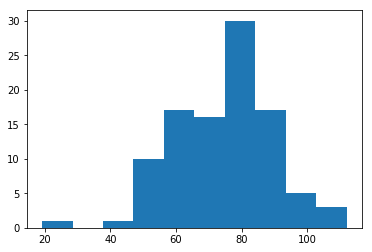

In [11]:
plt.hist(temps)